In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append(r'D:\github\ripple_heterogeneity\python')
import replay_rank_order
import functions,loading,replay_run
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import importlib
import glob
import os
import pickle
import replay_fig
import seaborn as sns
import nelpy as nel
import nelpy.plotting as npl
import random

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [3]:
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'

df = replay_run.load_results(save_path)

In [6]:
behav_df = loading.load_animal_behavior("Z:\Data\GrosmarkAD\Achilles\Achilles_10252013")

(-9.42617571427521, 236.36750428571364, -16.504707499995128, 24.02783845237943)

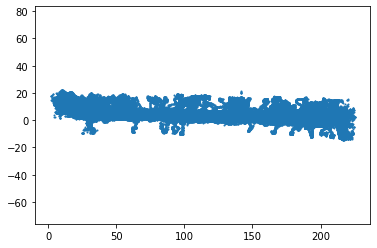

In [30]:
plt.scatter(x=behav_df.x,y=behav_df.y,s=1)
plt.axis('equal')


In [ ]:
basepath = df.basepath.unique()[9]
behav_df = loading.load_animal_behavior(basepath)
fig = px.scatter(x=behav_df.time,y=behav_df.linearized)
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(x=behav_df.time,y=behav_df.linearized)
fig.show()

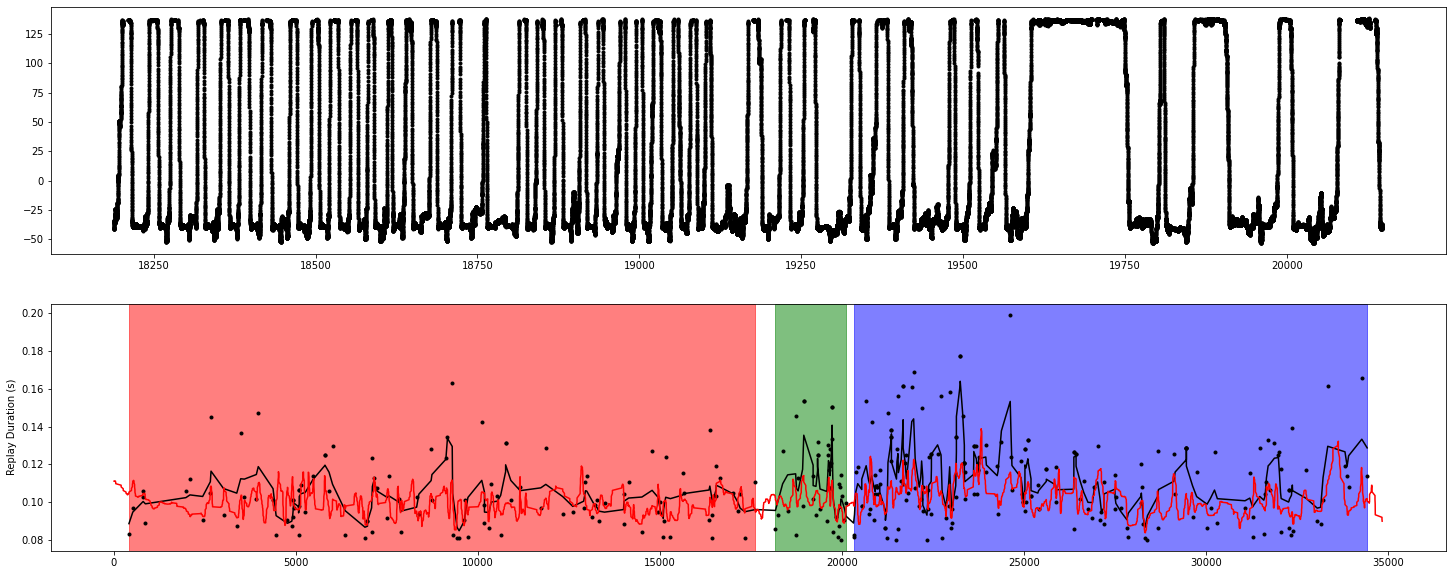

In [10]:
from scipy.ndimage import gaussian_filter1d

replay_df = df[(df.basepath == "Z:\Data\GrosmarkAD\Achilles\Achilles_10252013") & (df.score_pval_time_swap < 0.05)].sort_values(by='start')
ripple_df = df[(df.basepath == "Z:\Data\GrosmarkAD\Achilles\Achilles_10252013")].sort_values(by='start')

fig,ax = plt.subplots(2,1,figsize=(25,10))


ax[0].plot(behav_df.time,behav_df.x,'.k')
# ax[0].plot(behav_df.time,behav_df.linearized,'.g')


# plt.plot(replay_df.start,replay_df.duration,'k')
ax[1].plot(replay_df.start,gaussian_filter1d(replay_df.duration, 1),'k')
ax[1].plot(replay_df.start,replay_df.duration,'.k')
ax[1].set_ylabel('Replay Duration (s)')

# plt.plot(ripple_df.start,ripple_df.duration,'r')
ax[1].plot(ripple_df.start,gaussian_filter1d(ripple_df.duration, 5),'r')
# ax[1].plot(ripple_df.start,ripple_df.duration,'.r')

ax[1].axvspan(replay_df.start[replay_df.epoch == "pre_sleep"].min(),replay_df.start[replay_df.epoch == "pre_sleep"].max(),color='red',alpha=0.5)
ax[1].axvspan(replay_df.start[replay_df.epoch == "linear"].min(),replay_df.start[replay_df.epoch == "linear"].max(),color='green',alpha=0.5)
ax[1].axvspan(replay_df.start[replay_df.epoch == "post_sleep"].min(),replay_df.start[replay_df.epoch == "post_sleep"].max(),color='blue',alpha=0.5)

# ax[0].set_xlim(replay_df.start[replay_df.epoch == "linear"].min()-60*5,replay_df.start[replay_df.epoch == "linear"].max()+60*10)
# ax[1].set_xlim(replay_df.start[replay_df.epoch == "linear"].min()-60*5,replay_df.start[replay_df.epoch == "linear"].max()+60*10)

In [21]:
temp_df.epoch.unique()

array(['pre_sleep', 'linear', 'post_sleep'], dtype=object)

In [36]:
basepath = 'Z:\Data\GrosmarkAD\Achilles\Achilles_10252013'

st,cell_metrics = loading.load_spikes(basepath,putativeCellType='Pyramidal',brainRegion='CA1')
ripples = loading.load_ripples_events(basepath)

ripple_epoch = nel.EpochArray(np.array([ripples.start, ripples.stop]).T)

beh_df = loading.load_epoch(basepath)
beh_epochs = nel.EpochArray(np.array([beh_df.startTime, beh_df.stopTime]).T)



In [6]:
basepath = 'Z:\Data\GrosmarkAD\Achilles\Achilles_10252013'

ripples = loading.load_ripples_events(basepath)

ripple_epoch = nel.EpochArray(np.array([ripples.start, ripples.stop]).T)


nChannels, fs, fs_dat, shank_to_channel = loading.loadXML(basepath)
lfp, timestep = loading.loadLFP(basepath,
                                n_channels=nChannels,
                                channel=[74, 83],
                                frequency=fs,
                                ext='lfp')


In [8]:
lfp = nel.AnalogSignalArray(data=lfp.T, timestamps=np.array(timestep), fs=1250)


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [ ]:
import warnings
warnings.filterwarnings("ignore")
for i, ep in enumerate(ripple_epoch[0:50]):
    plt.figure()
    plt.plot(lfp[ep.expand(0.075)].abscissa_vals, lfp[ep.expand(0.075)].data.T)
